<a href="https://colab.research.google.com/github/jmParkGit/Colab/blob/main/Sparta_deepLearningWithImage/week4/week4_%EC%96%BC%EA%B5%B4%EC%97%90%EC%8A%A4%ED%8B%B0%EC%BB%A4(%EC%BD%94)%EB%B6%99%EC%9D%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 얼굴에 스티커(코) 붙이기

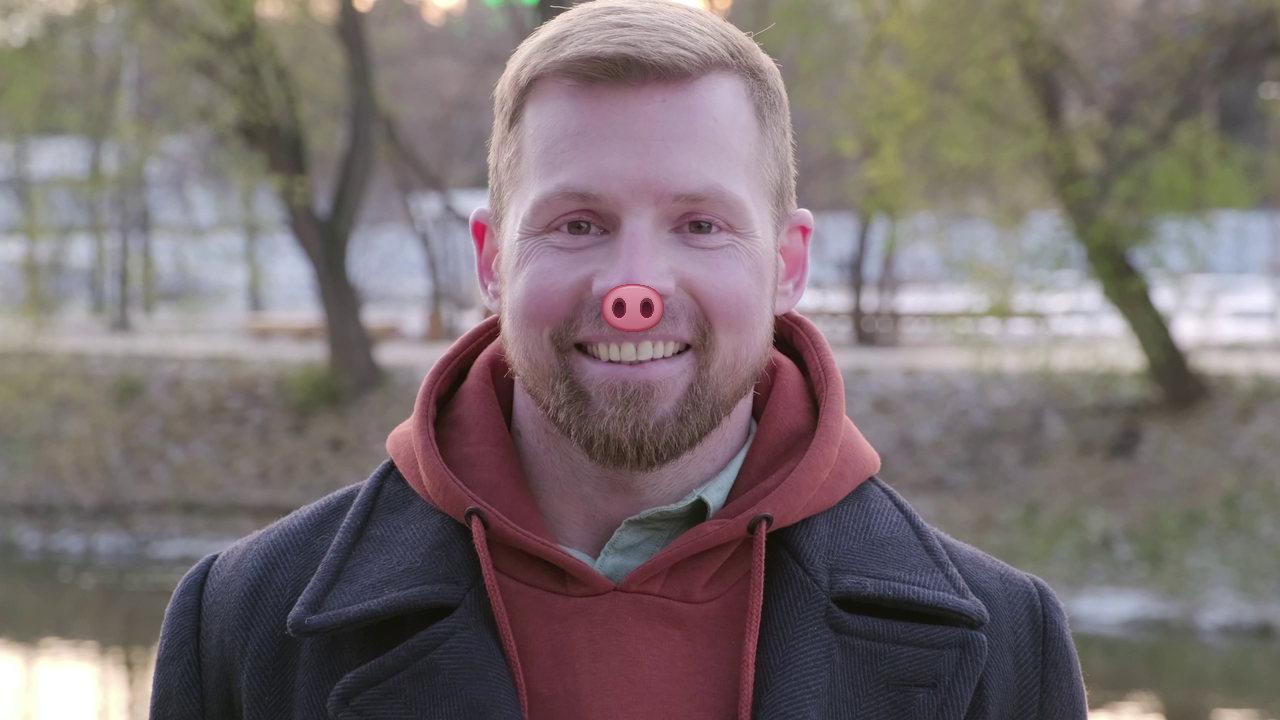

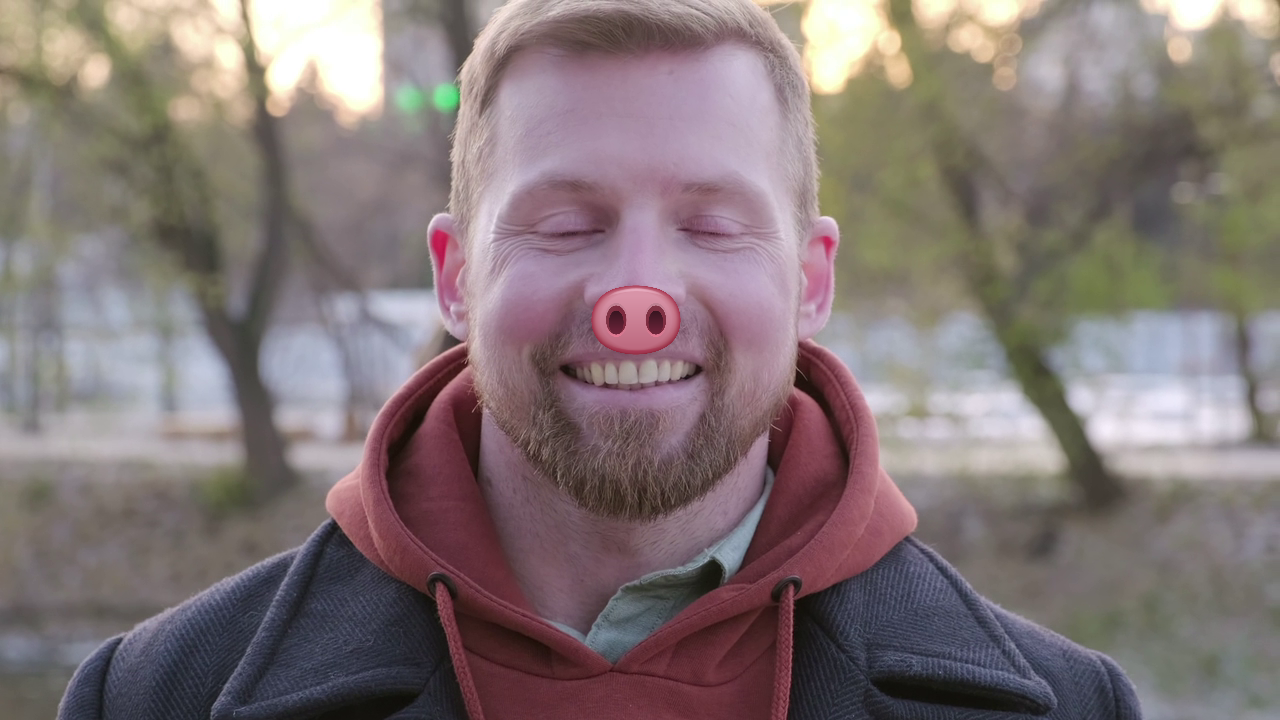

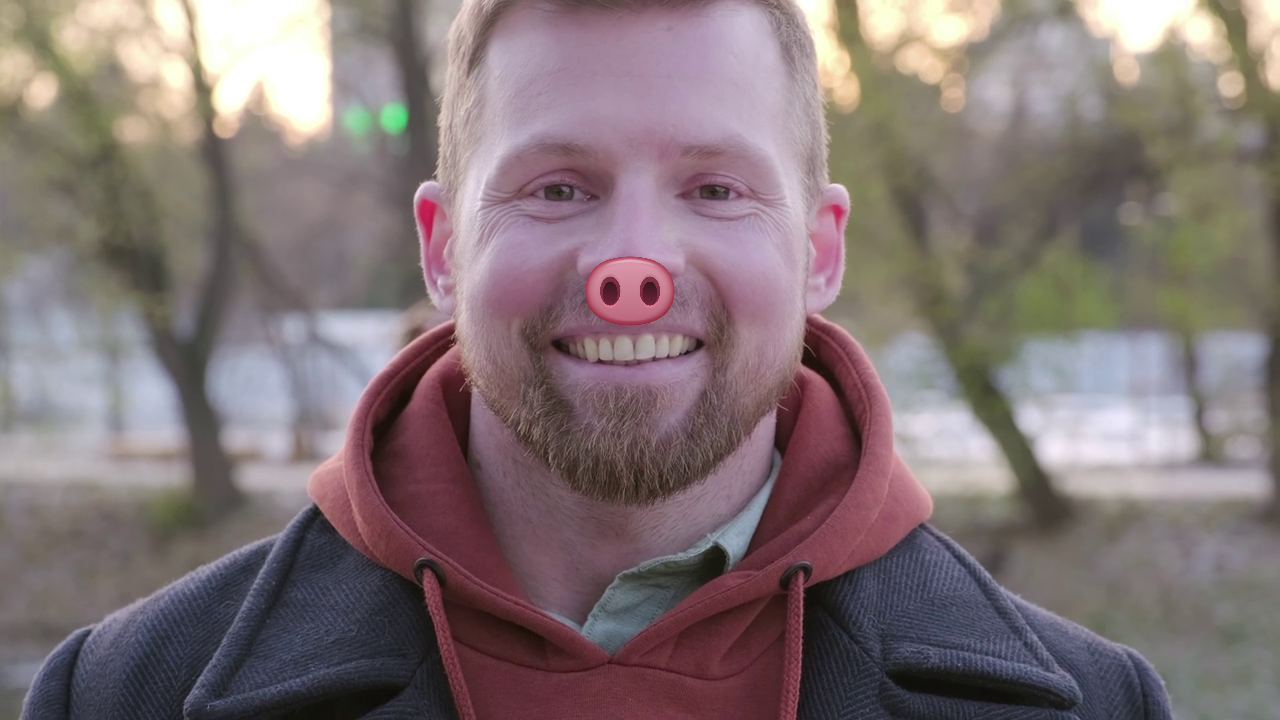

All frames are 206


In [1]:
import cv2
import dlib
from google.colab.patches import cv2_imshow

detector= dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('models/shape_predictor_5_face_landmarks.dat')

cap=cv2.VideoCapture('videos/02.mp4');
sticker_img = cv2.imread('imgs/pig.png',cv2.IMREAD_UNCHANGED);

f=0
while True:
    ret, img = cap.read()

    if ret == False:
        break

    # 얼굴영역 탐지하기
    dets = detector(img)
    # print("number of faces detected:", len(dets))

    # 사람 별로 얼굴에 코 붙이기
    for det in dets:
      shape = predictor(img,det);
      try:
        x1 = det.left()
        y1 = det.top()
        x2 = det.right()
        y2 = det.bottom()

        #코 스티커 크기 계산하기
        center_x = shape.parts()[4].x
        center_y = shape.parts()[4].y -5

        h, w, c = sticker_img.shape

        nose_w = int((x2-x1)/4)
        nose_h = int(h / w * nose_w)

        nose_x1 = int(center_x - nose_w/2)
        nose_x2 = nose_x1+nose_w

        nose_y1 = int(center_y - nose_h / 2)
        nose_y2 = nose_y1 + nose_h

        #이미지 오버레이하기
        overlay_img = sticker_img.copy()
        overlay_img = cv2.resize(overlay_img, dsize=(nose_w, nose_h))

        overlay_alpha = overlay_img[:, :, 3:4] / 255.0
        background_alpha = 1.0 - overlay_alpha

        img[nose_y1:nose_y2, nose_x1:nose_x2] = overlay_alpha * overlay_img[:, :, :3] + background_alpha * img[nose_y1:nose_y2, nose_x1:nose_x2]  
      except:
        pass

    # 이미지 출력
    if f%100==0:
      cv2_imshow(img)
    f=f+1;
    # cv2.imshow('result', img)
    # if cv2.waitKey(1) == ord('q'):
    #     break

print("All frames are "+ str(f))
  